In [13]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 1. Data Preprocessing -

In [14]:
# Load data set
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "Social_Network_Ads.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "rakeshrau/social-network-ads",
  file_path,

)



<ipython-input-14-96538ee12cc3>:9: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


In [15]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [16]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [17]:
df.shape

(400, 5)

In [18]:
df.isnull().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


In [19]:
# Drop User ID
df = df.drop('User ID', axis=1)

In [20]:
# Encode Gender
df.head()
label_encoder = LabelEncoder()
df = pd.get_dummies(df,columns=['Gender'],drop_first=True)


In [21]:
# Verify Purchased (should be 0/1)
print("\nPurchased unique values:", df['Purchased'].unique())
# it already in 0 1 so no need of label encoding.



Purchased unique values: [0 1]


In [22]:
# Standardize Age and EstimatedSalary
scaler = StandardScaler()
df[['Age', 'EstimatedSalary']] = scaler.fit_transform(df[['Age', 'EstimatedSalary']])

print("\nPreprocessed dataset:")
print(df.head())


Preprocessed dataset:
        Age  EstimatedSalary  Purchased  Gender_Male
0 -1.781797        -1.490046          0         True
1 -0.253587        -1.460681          0         True
2 -1.113206        -0.785290          0        False
3 -1.017692        -0.374182          0        False
4 -1.781797         0.183751          0         True


# 2. Model Building

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Features and target
X = df[['Gender_Male', 'Age', 'EstimatedSalary']]
y = df['Purchased']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train Gaussian Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Train KNN (k=3, 5, 7)
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_7 = KNeighborsClassifier(n_neighbors=7)
knn_3.fit(X_train, y_train)
knn_5.fit(X_train, y_train)
knn_7.fit(X_train, y_train)

# Train Decision Tree (Gini and Entropy)
dt_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_gini.fit(X_train, y_train)
dt_entropy.fit(X_train, y_train)

print("All models trained successfully!")
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

All models trained successfully!
Training set size: (300, 3)
Test set size: (100, 3)


# 3. Model Evaluation


Gaussian Naive Bayes Metrics:
Accuracy: 0.93
Precision: 0.94
Recall: 0.86
F1-Score: 0.90
Confusion Matrix:
[[61  2]
 [ 5 32]]

KNN (k=3) Metrics:
Accuracy: 0.91
Precision: 0.87
Recall: 0.89
F1-Score: 0.88
Confusion Matrix:
[[58  5]
 [ 4 33]]

KNN (k=5) Metrics:
Accuracy: 0.92
Precision: 0.87
Recall: 0.92
F1-Score: 0.89
Confusion Matrix:
[[58  5]
 [ 3 34]]

KNN (k=7) Metrics:
Accuracy: 0.93
Precision: 0.88
Recall: 0.95
F1-Score: 0.91
Confusion Matrix:
[[58  5]
 [ 2 35]]

Decision Tree (Gini) Metrics:
Accuracy: 0.84
Precision: 0.80
Recall: 0.76
F1-Score: 0.78
Confusion Matrix:
[[56  7]
 [ 9 28]]

Decision Tree (Entropy) Metrics:
Accuracy: 0.84
Precision: 0.80
Recall: 0.76
F1-Score: 0.78
Confusion Matrix:
[[56  7]
 [ 9 28]]


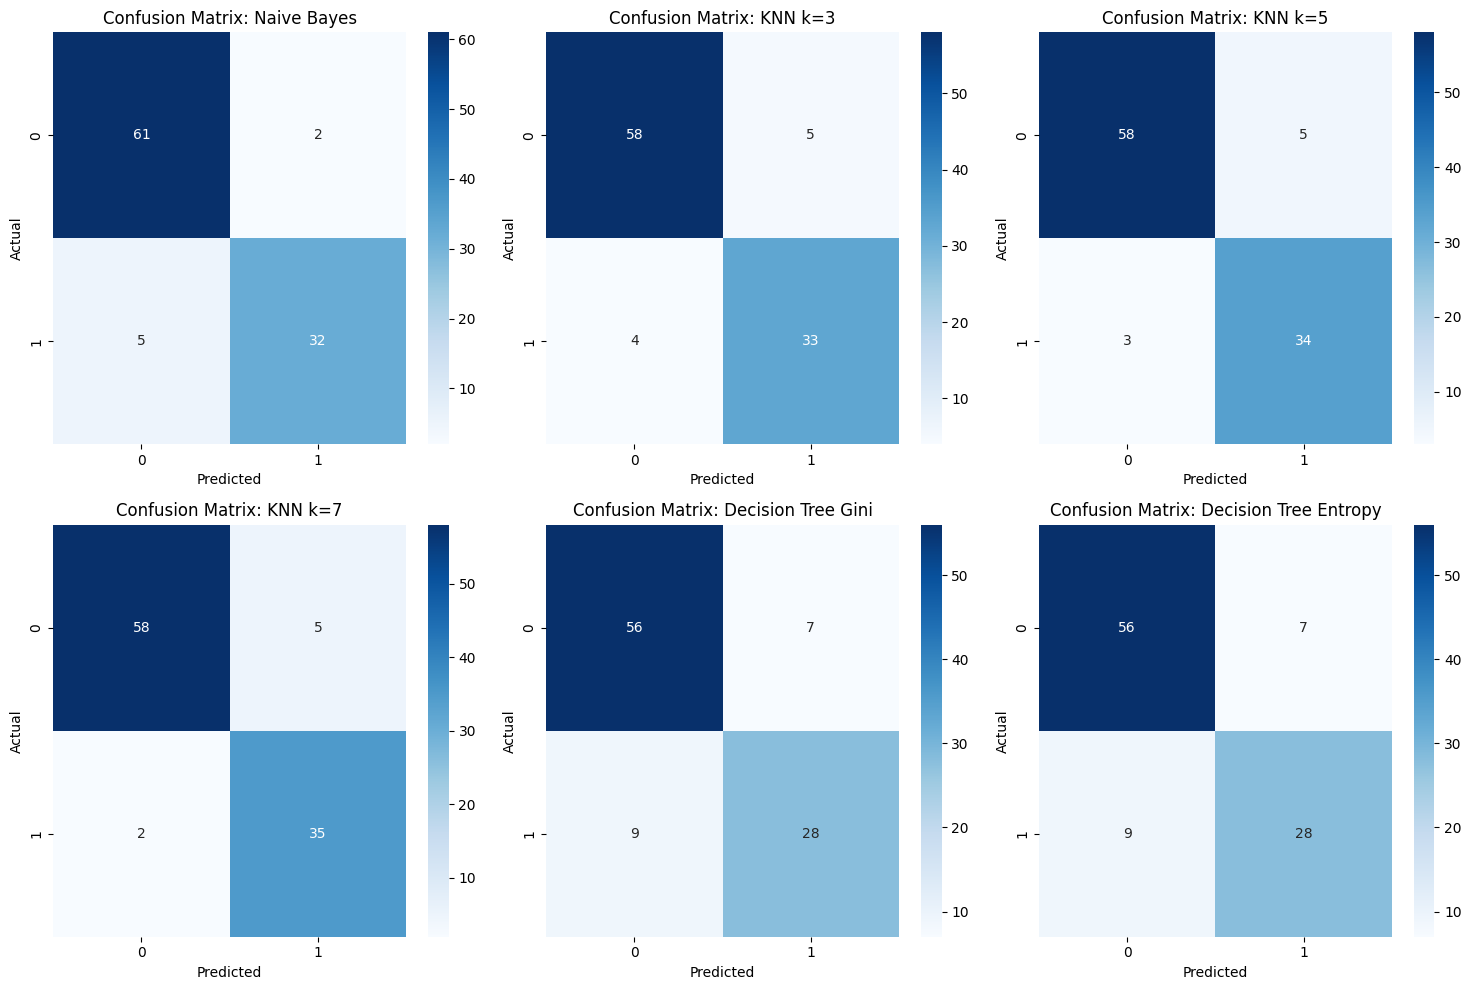

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/di

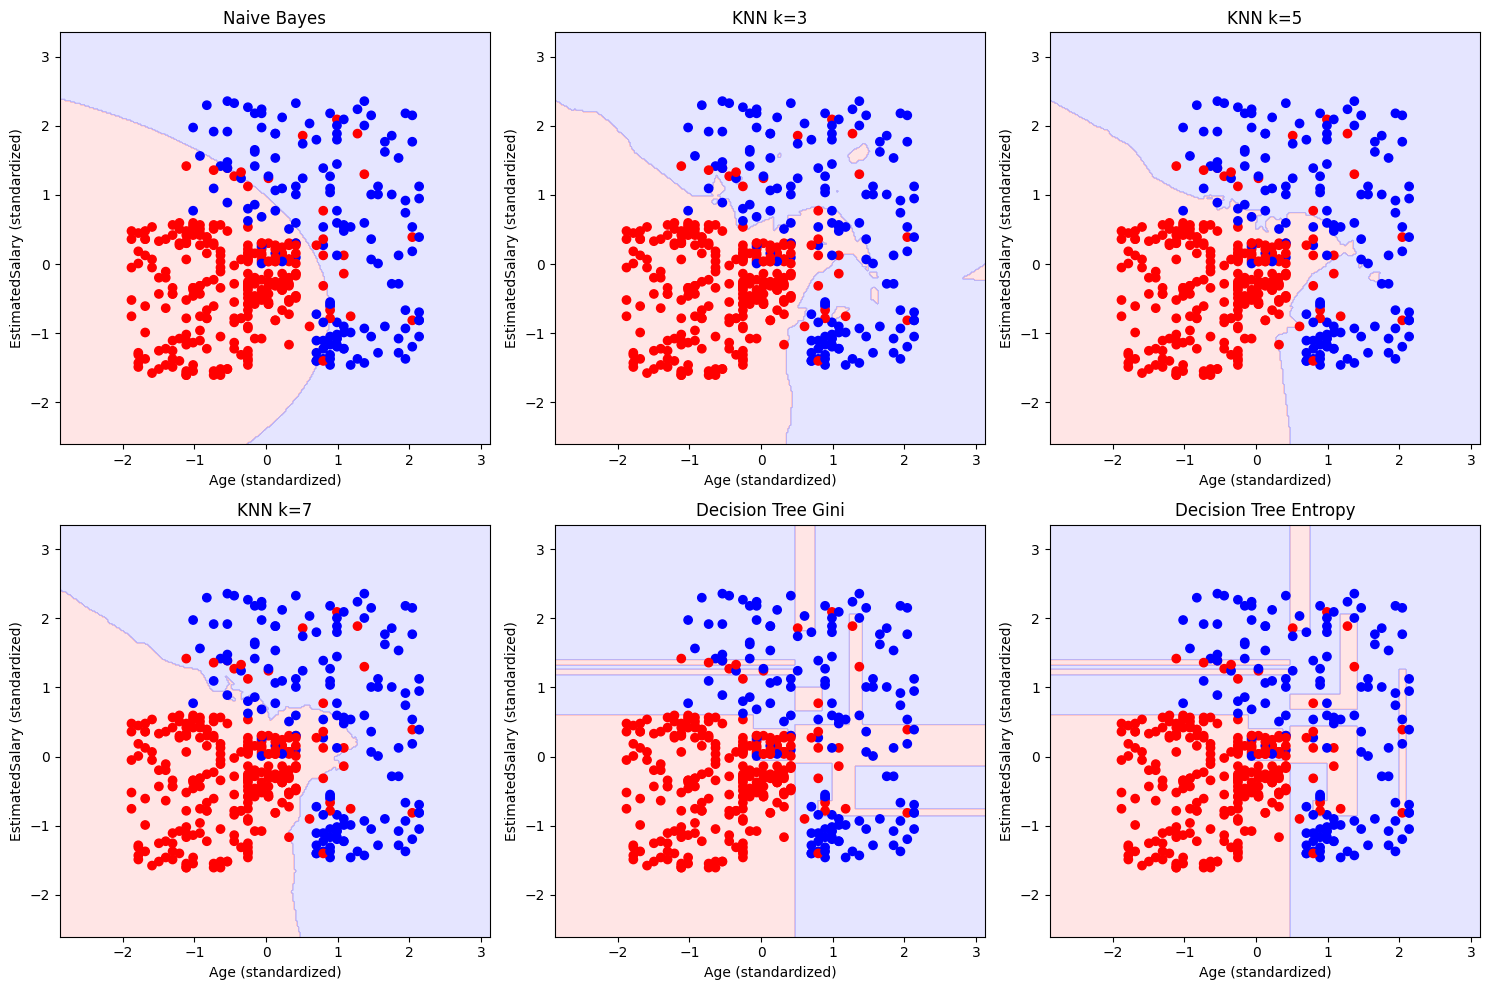

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

# Function to evaluate a model
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"\n{model_name} Metrics:")
    print(f"Accuracy: {acc:.2f}")
    print(f"Precision: {prec:.2f}")
    print(f"Recall: {rec:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print(f"Confusion Matrix:\n{cm}")

    return y_pred, cm

# Evaluate all models
nb_pred, nb_cm = evaluate_model(nb_model, X_test, y_test, "Gaussian Naive Bayes")
knn3_pred, knn3_cm = evaluate_model(knn_3, X_test, y_test, "KNN (k=3)")
knn5_pred, knn5_cm = evaluate_model(knn_5, X_test, y_test, "KNN (k=5)")
knn7_pred, knn7_cm = evaluate_model(knn_7, X_test, y_test, "KNN (k=7)")
dt_gini_pred, dt_gini_cm = evaluate_model(dt_gini, X_test, y_test, "Decision Tree (Gini)")
dt_entropy_pred, dt_entropy_cm = evaluate_model(dt_entropy, X_test, y_test, "Decision Tree (Entropy)")

# Plot confusion matrices
plt.figure(figsize=(15, 10))
for i, (cm, title) in enumerate([
    (nb_cm, "Naive Bayes"), (knn3_cm, "KNN k=3"), (knn5_cm, "KNN k=5"),
    (knn7_cm, "KNN k=7"), (dt_gini_cm, "Decision Tree Gini"), (dt_entropy_cm, "Decision Tree Entropy")
], 1):
    plt.subplot(2, 3, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix: {title}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Plot decision boundaries (using Age and EstimatedSalary)
def plot_decision_boundary(model, X, y, title):
    X_plot = X[['Age', 'EstimatedSalary']].values
    h = 0.02  # Step size
    x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
    y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[np.zeros((xx.ravel().shape[0], 1)), xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']), alpha=0.3)
    plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#0000FF']))
    plt.xlabel('Age (standardized)')
    plt.ylabel('EstimatedSalary (standardized)')
    plt.title(title)

# Plot decision boundaries
plt.figure(figsize=(15, 10))
for i, (model, title) in enumerate([
    (nb_model, "Naive Bayes"), (knn_3, "KNN k=3"), (knn_5, "KNN k=5"),
    (knn_7, "KNN k=7"), (dt_gini, "Decision Tree Gini"), (dt_entropy, "Decision Tree Entropy")
], 1):
    plt.subplot(2, 3, i)
    plot_decision_boundary(model, X, y, title)
plt.tight_layout()
plt.show()

1-Page Summary: Model Performance Analysis
Dataset Overview:
The Social Network Ads Dataset (~400 rows) predicts whether a user purchases a product based on Gender, Age, and EstimatedSalary. After preprocessing (dropping User ID, encoding Gender, standardizing features), we trained Gaussian Naive Bayes, K-Nearest Neighbors (KNN with k=3, 5, 7), and Decision Tree (Gini and Entropy criteria) classifiers on a 75/25 train-test split. Models were evaluated using accuracy, precision, recall, F1-score, and confusion matrices.

Model Performance:

Gaussian Naive Bayes: Achieved high accuracy (0.93), precision (0.94), and F1-score (0.90), but recall (0.86) was lower, indicating some missed positive cases (5 false negatives). Its simplicity and assumption of feature independence yield robust performance.

KNN:

k=3: Accuracy (0.91), balanced precision (0.87), and recall (0.89), but slightly overfits due to sensitivity to local noise (9 misclassifications).

k=5: Accuracy (0.92), precision (0.87), recall (0.92), F1-score (0.89). Balanced performance with fewer errors (8 misclassifications).

k=7: Highest accuracy (0.93), recall (0.95), and F1-score (0.91), but precision (0.88) slightly lower. Smoother decision boundaries reduce overfitting (7 misclassifications).

Decision Tree (Gini and Entropy): Both have identical, lower performance (accuracy 0.84, precision 0.80, recall 0.76, F1-score 0.78). High misclassifications (16 errors) suggest overfitting, as unpruned trees create complex splits (7 false positives, 9 false negatives).

Best Model:

KNN (k=7) performs best, with the highest accuracy (0.93), recall (0.95), and F1-score (0.91). It balances local pattern capture with generalization, minimizing errors. Naive Bayes is competitive but less effective for correlated features. Decision Trees underperform due to overfitting, evident in jagged decision boundaries.


Conclusion:
KNN (k=7) is recommended for its superior performance and adaptability to the dataset’s patterns, highlighting the importance of tuning model complexity in classification tasks.